In [554]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv("train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [555]:
train.shape

(1460, 81)

In [556]:
train.drop('Id',axis=1,inplace=True)

In [557]:
train.isnull().mean().sort_values(ascending=False).head(4).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [558]:
train.drop(['MSSubClass', 'MSZoning', 'GarageYrBlt', 'GarageType'],axis=1,inplace=True)

In [559]:
train_miss=[i for i in train.columns if train[i].isnull().sum()>0]
train_miss


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

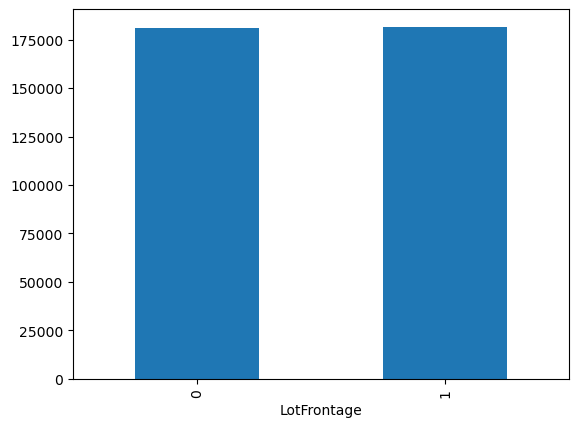

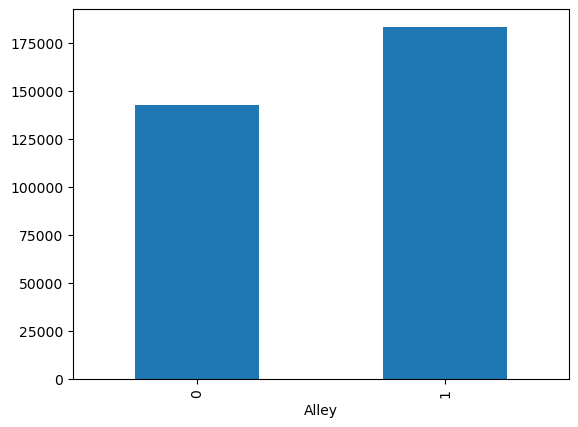

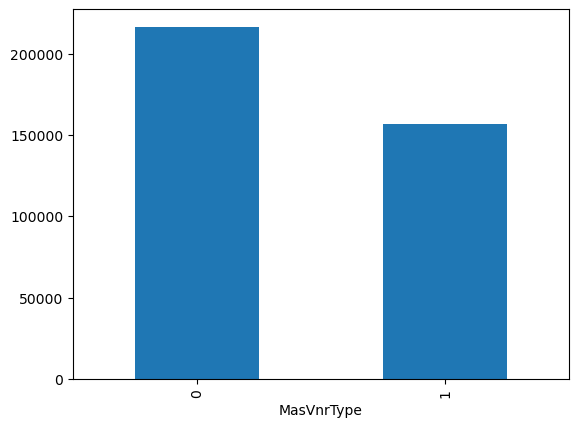

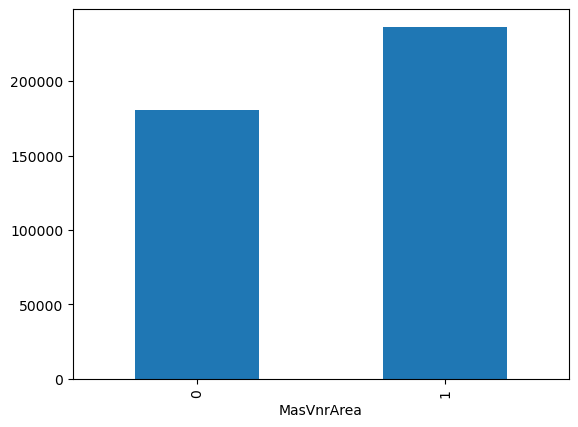

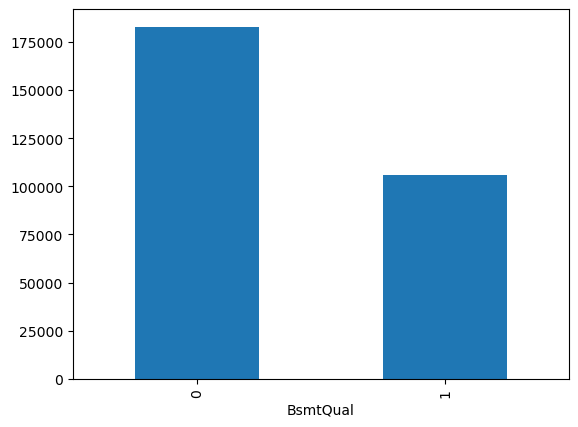

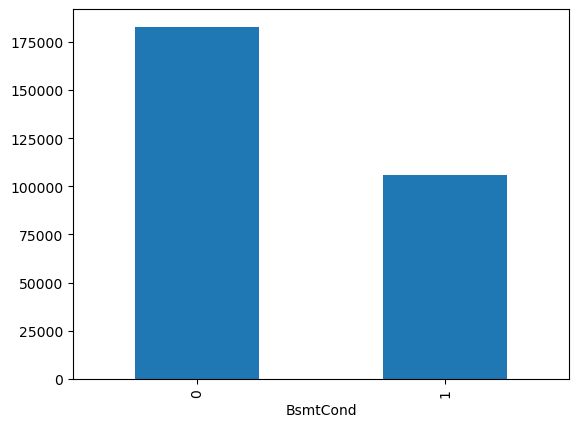

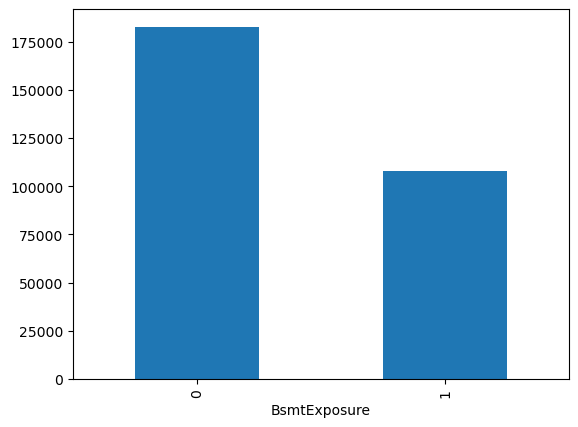

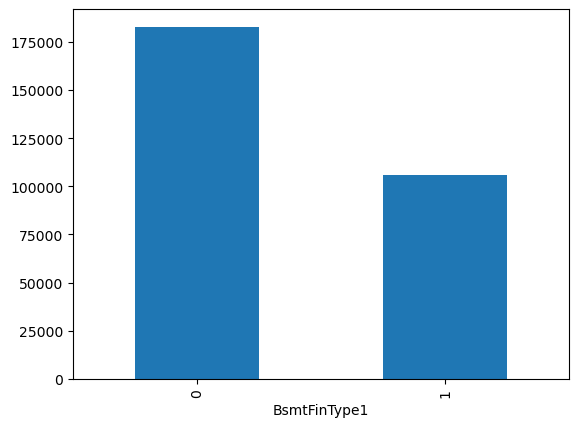

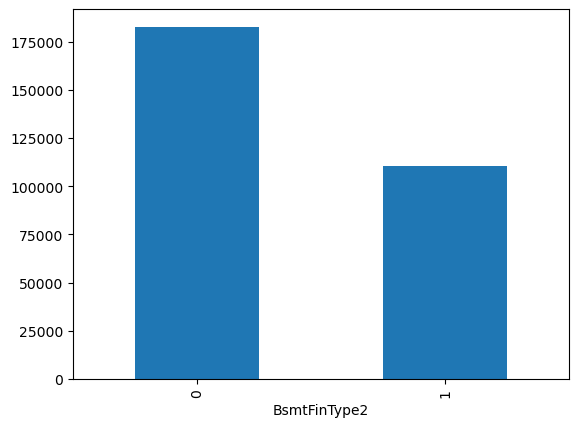

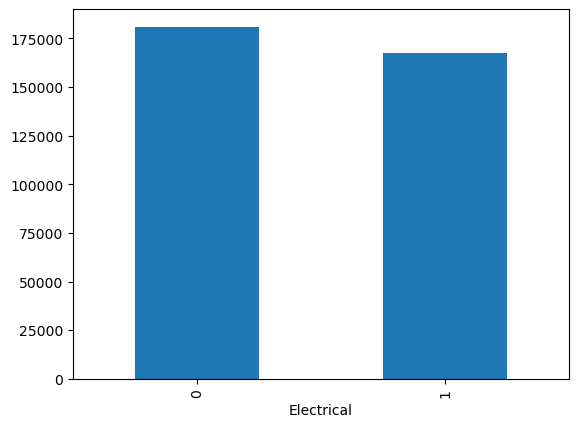

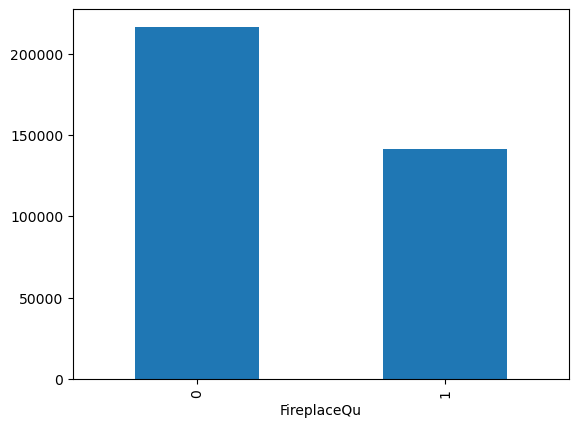

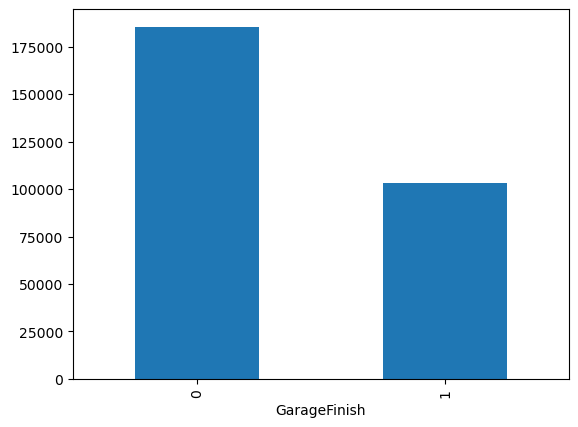

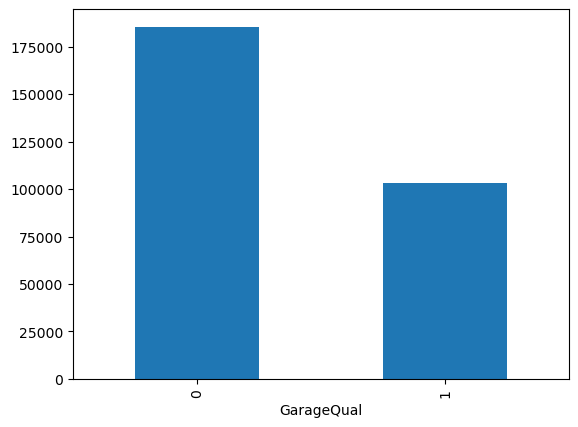

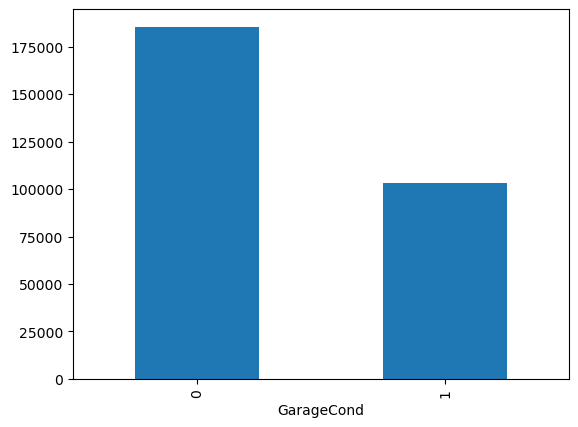

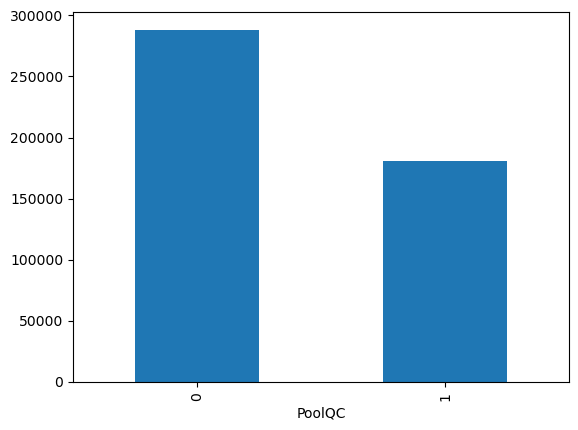

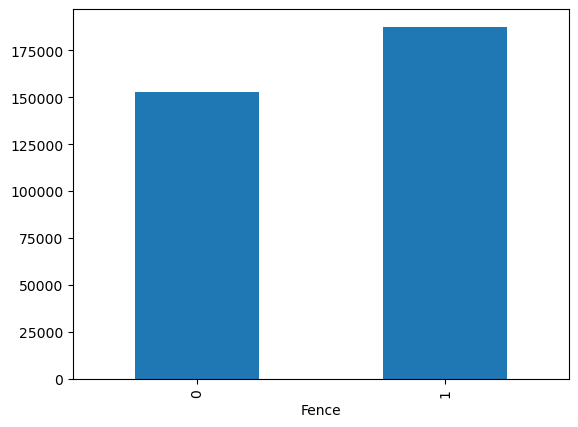

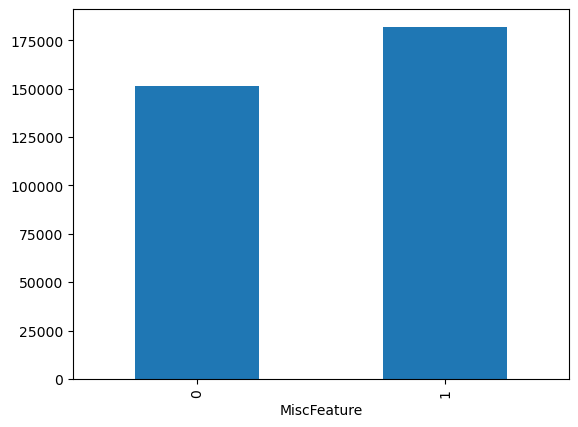

In [560]:
for i in train_miss:
    train[i]=np.where(train[i].isnull(),1,0)
    train.groupby(i)["SalePrice"].mean().plot.bar()
    plt.show()

In [561]:
train_miss=train[train_miss]
train_num=[i for i in train.columns if train[i].dtypes!="O"]
train_num


['LotFrontage',
 'LotArea',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [562]:
train_cat=[i for i in train.columns if train[i].dtypes=="O"]
train_num


['LotFrontage',
 'LotArea',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

<Axes: >

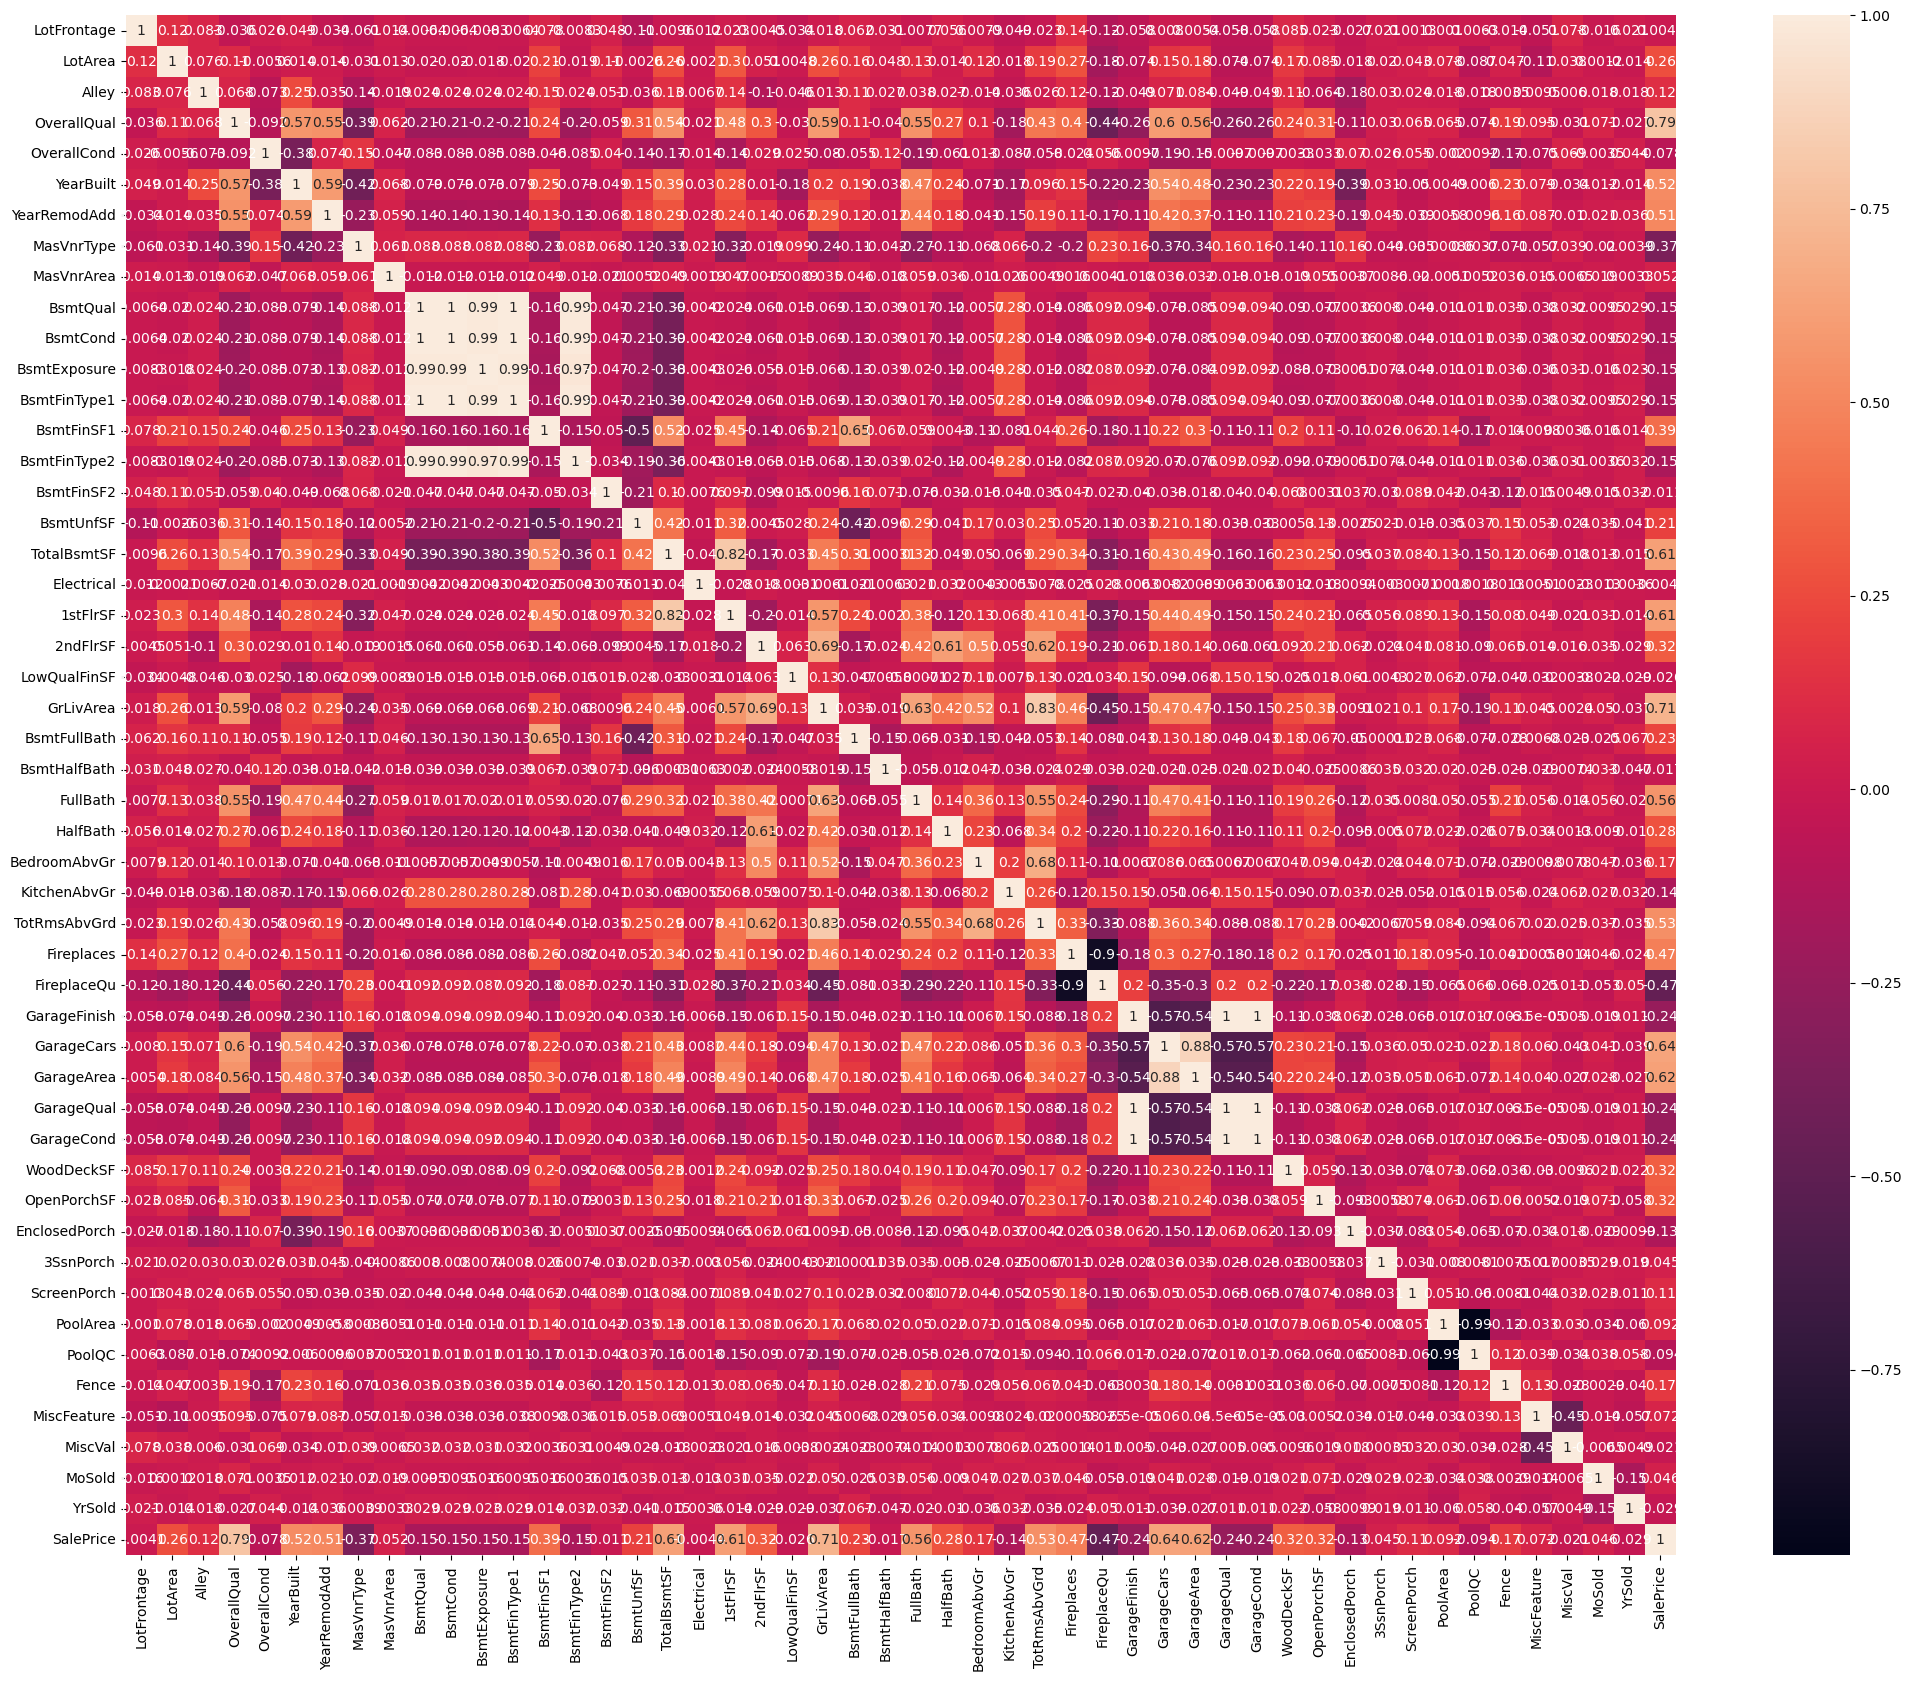

In [563]:
plt.figure(figsize=(25,20))
sns.heatmap(train[train_num].corr(),annot=True)

<Axes: >

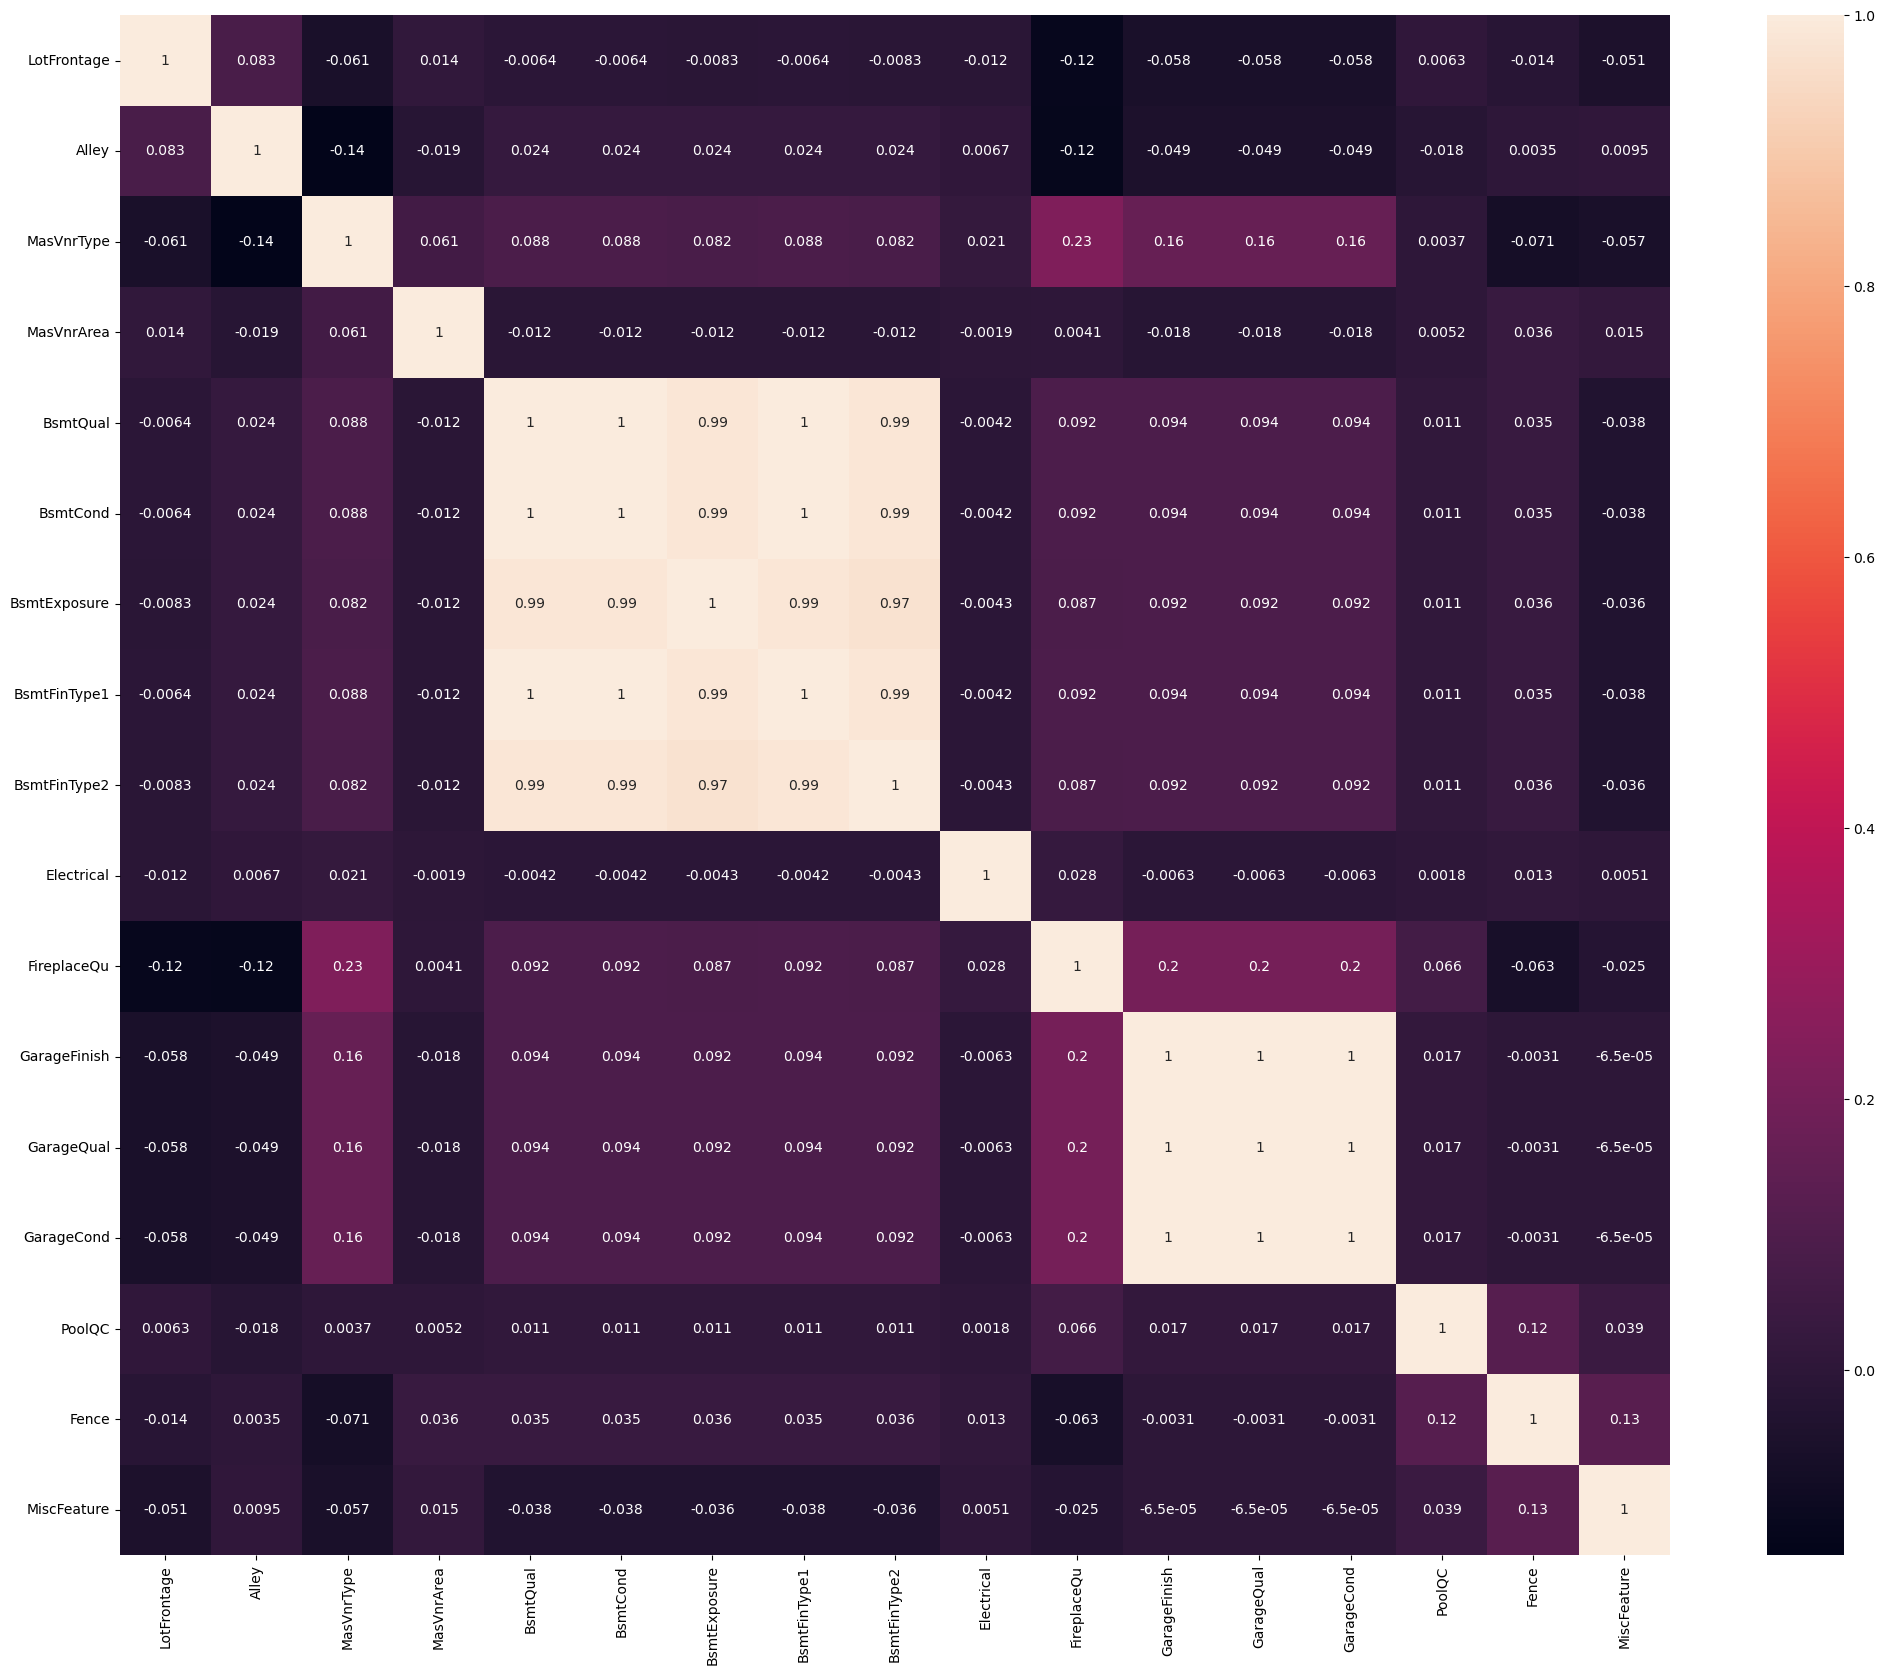

In [564]:
plt.figure(figsize=(25,20))
sns.heatmap(train_miss.corr(),annot=True)

In [565]:
train_desc=[i for i in train_num if len(train[i].unique())<25]

In [566]:
train_desc

['LotFrontage',
 'Alley',
 'OverallQual',
 'OverallCond',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold']

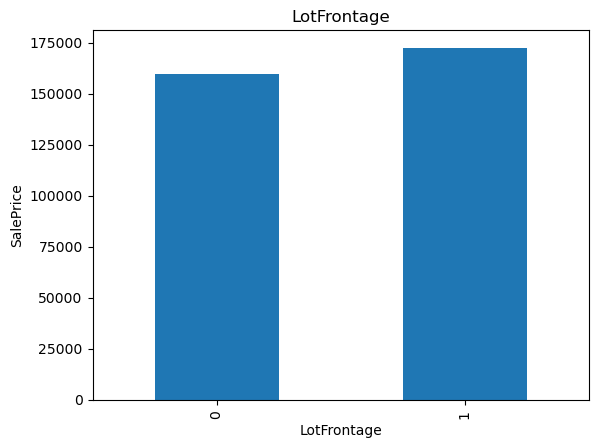

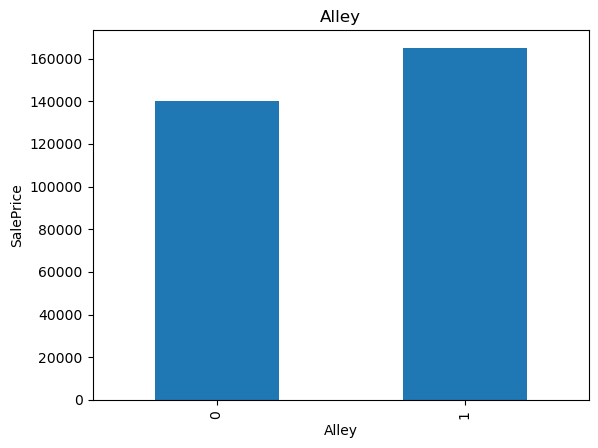

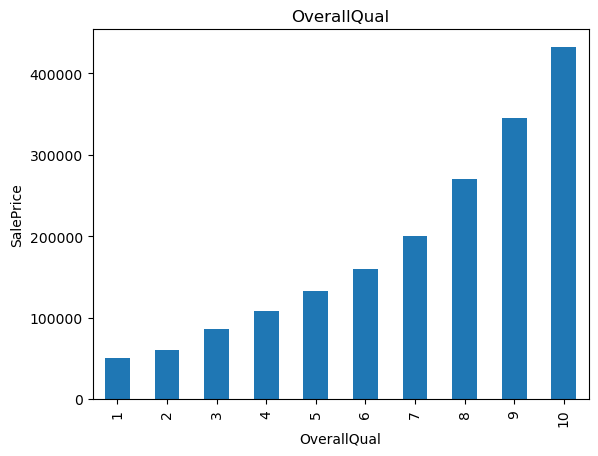

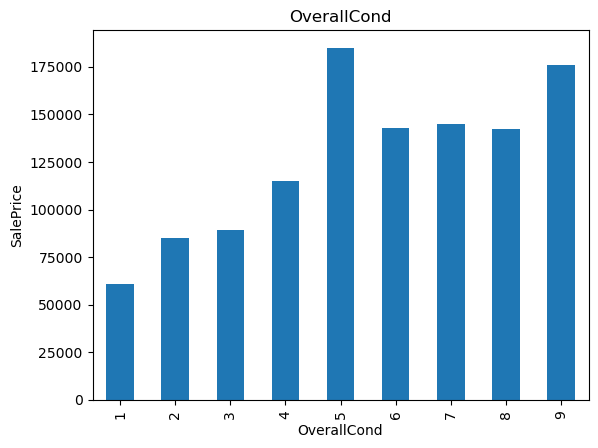

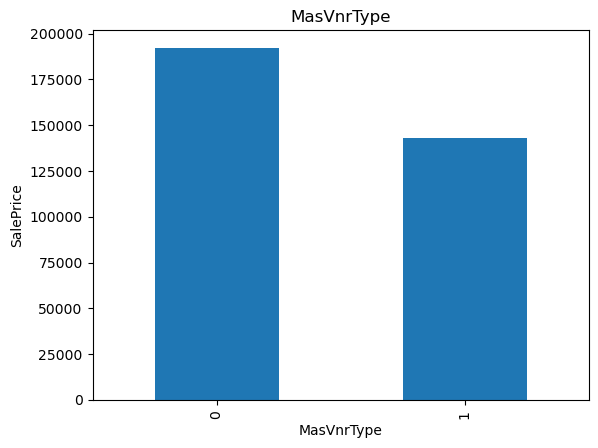

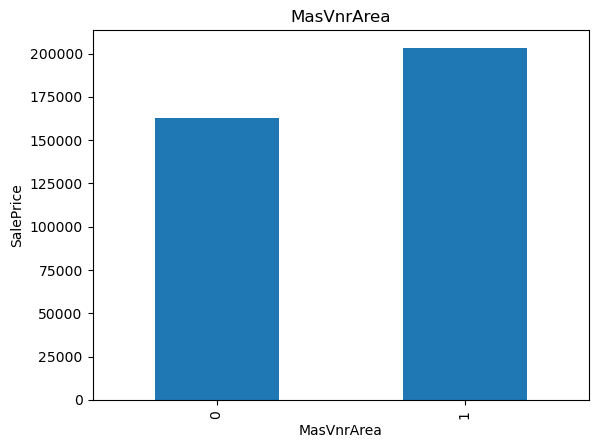

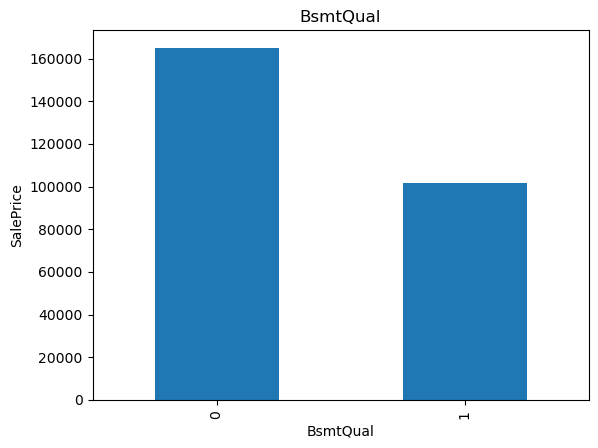

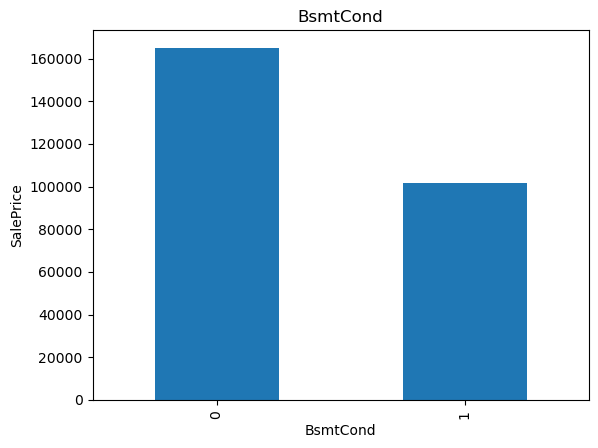

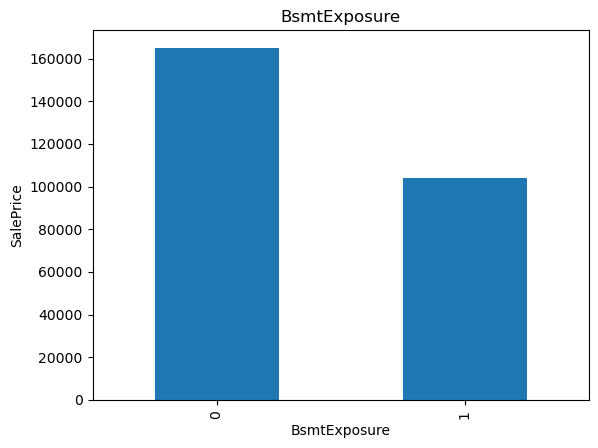

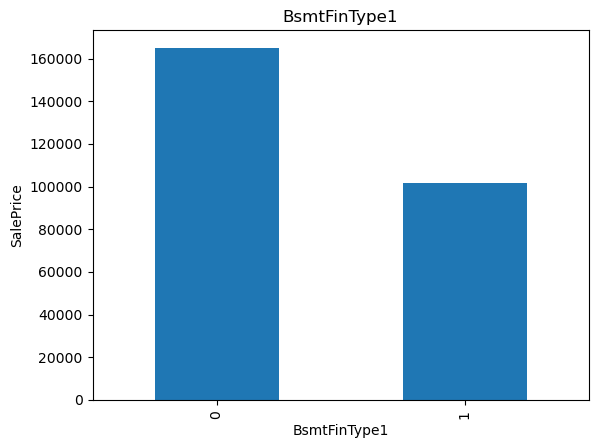

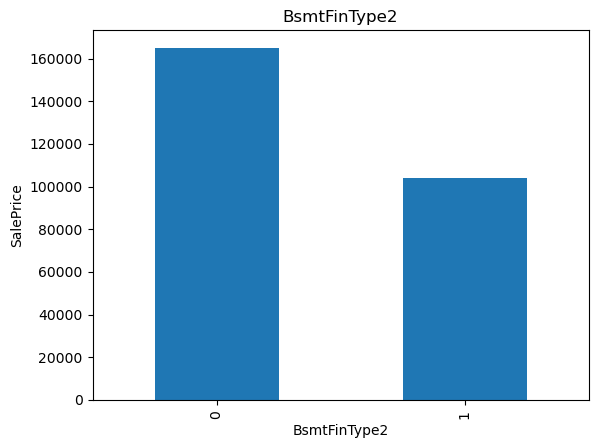

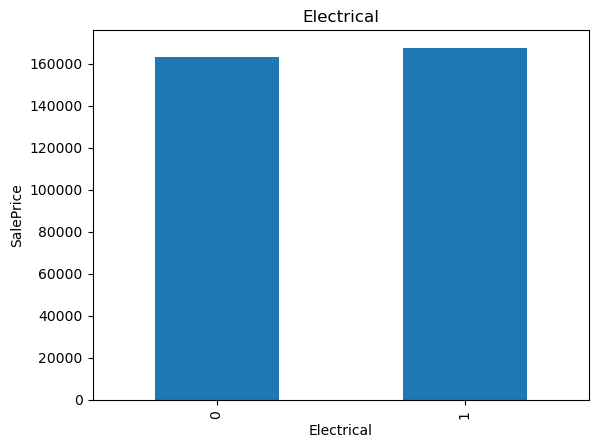

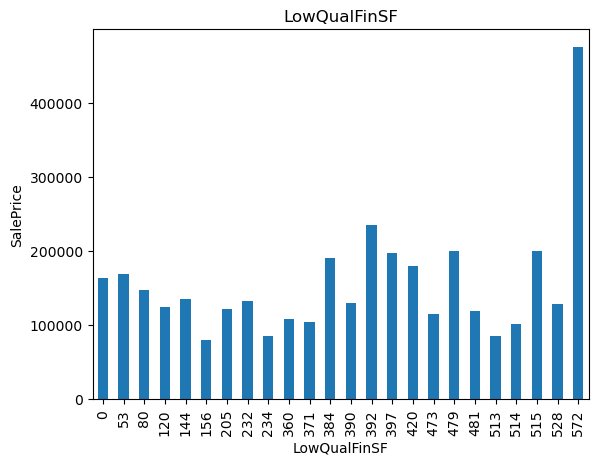

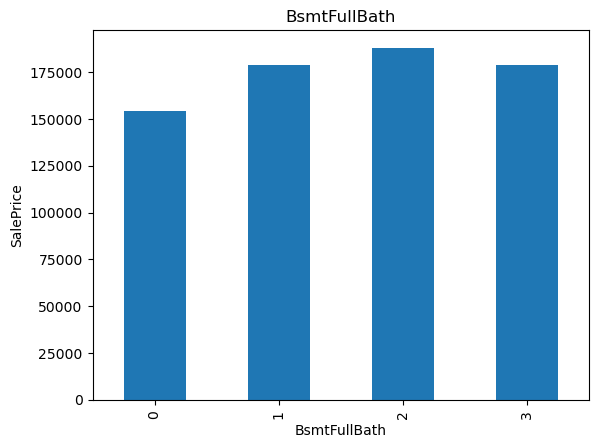

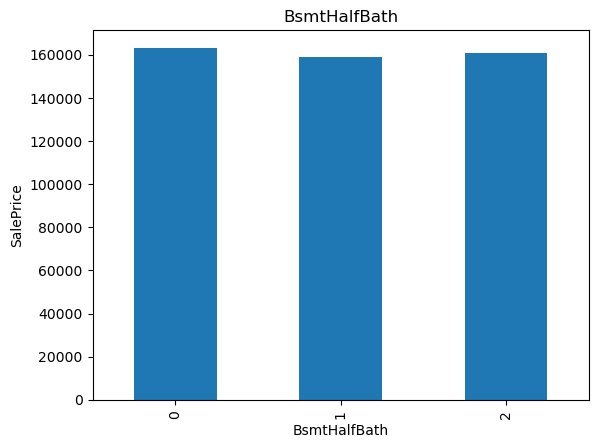

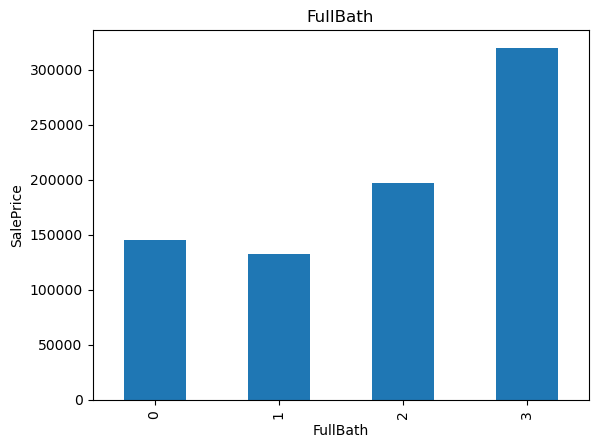

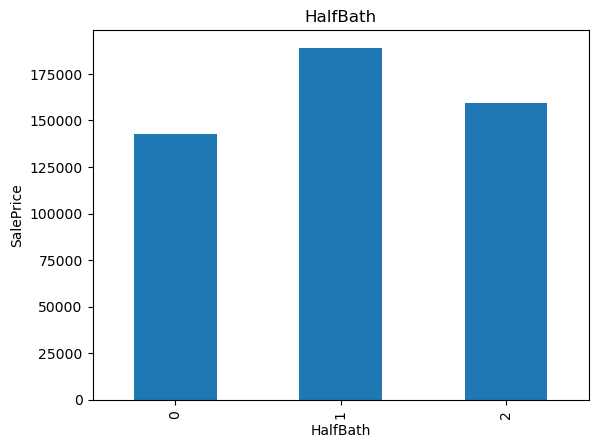

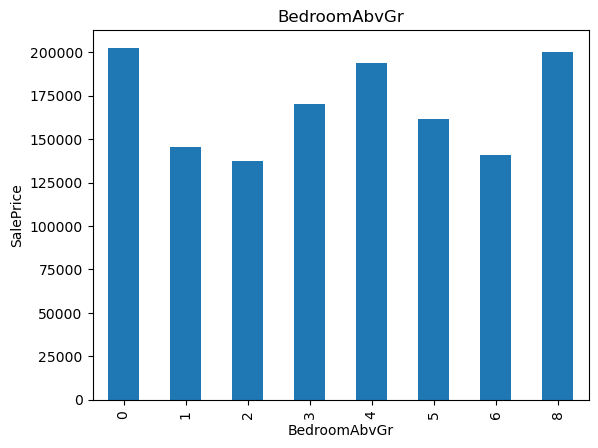

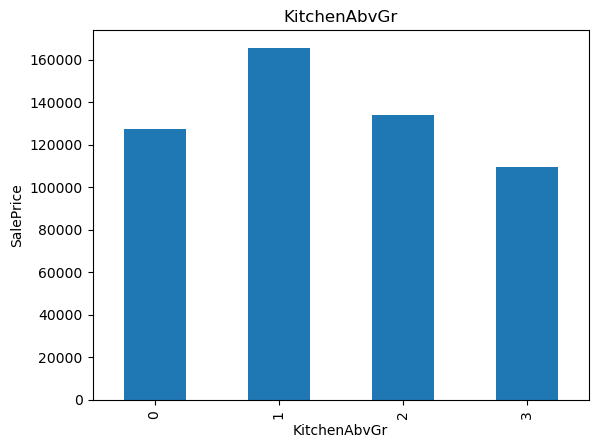

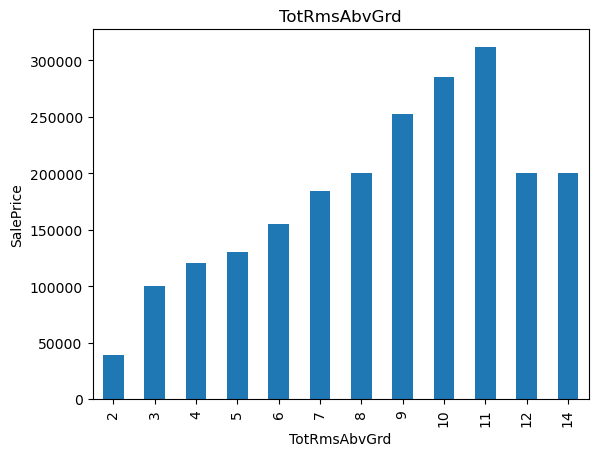

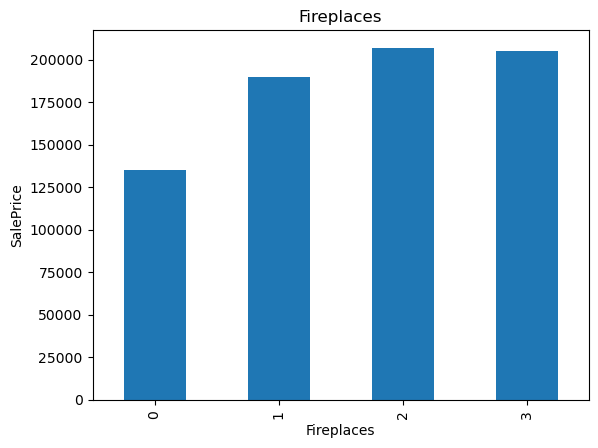

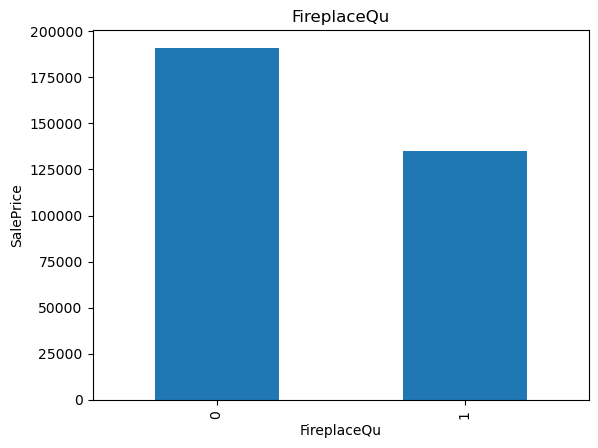

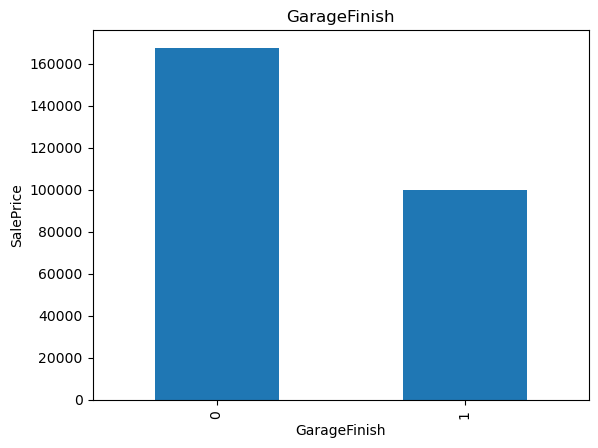

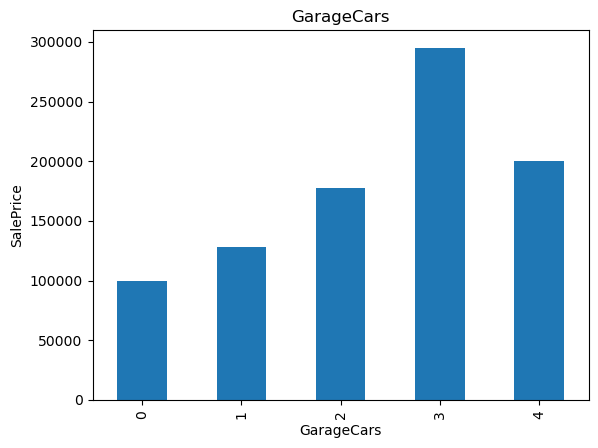

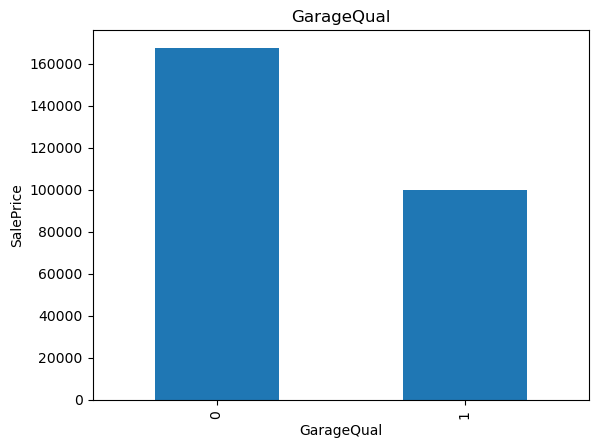

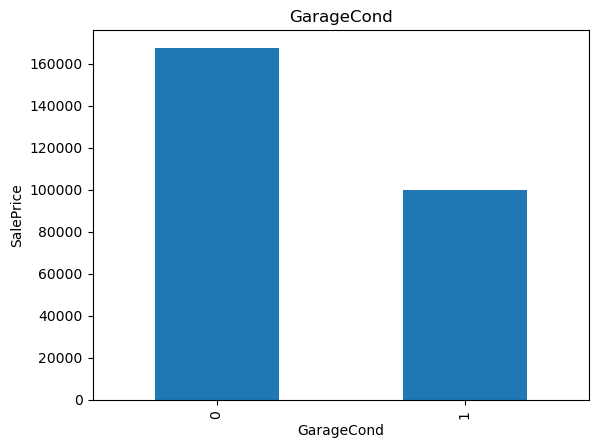

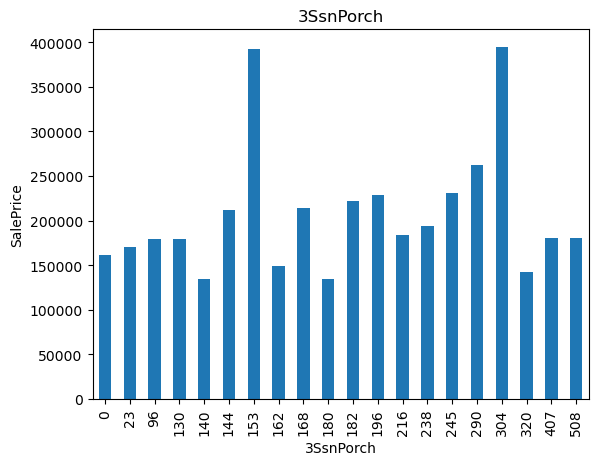

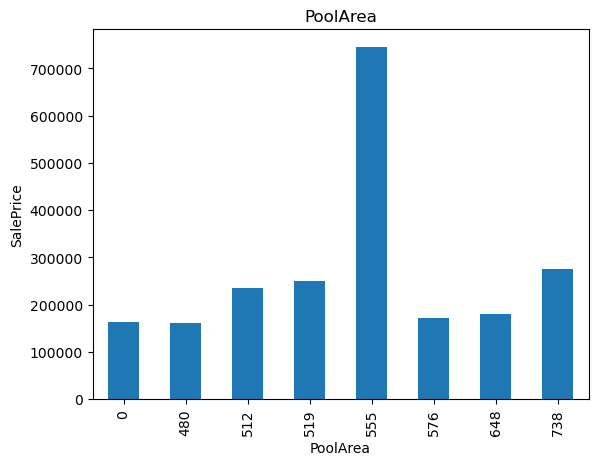

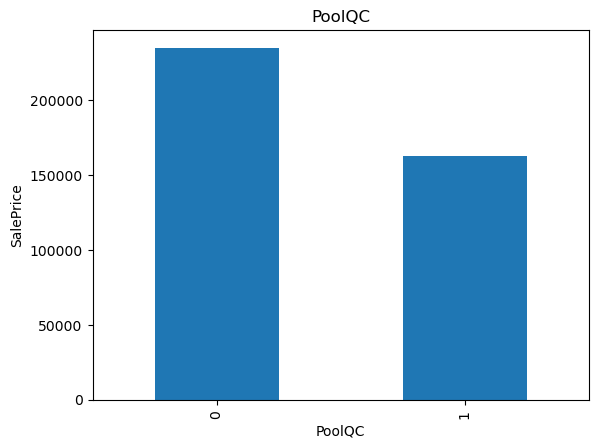

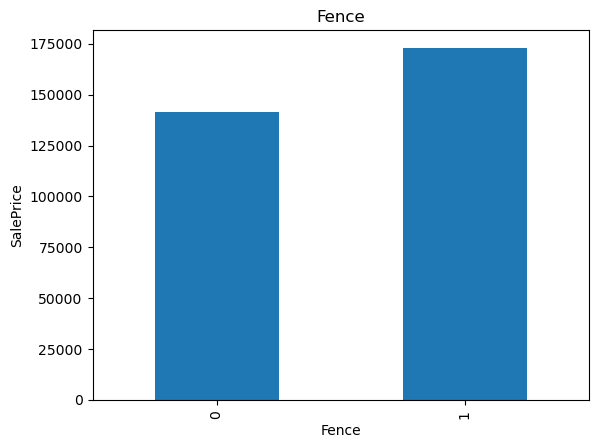

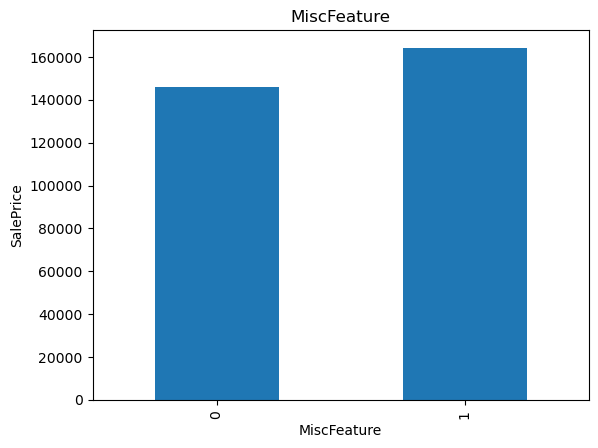

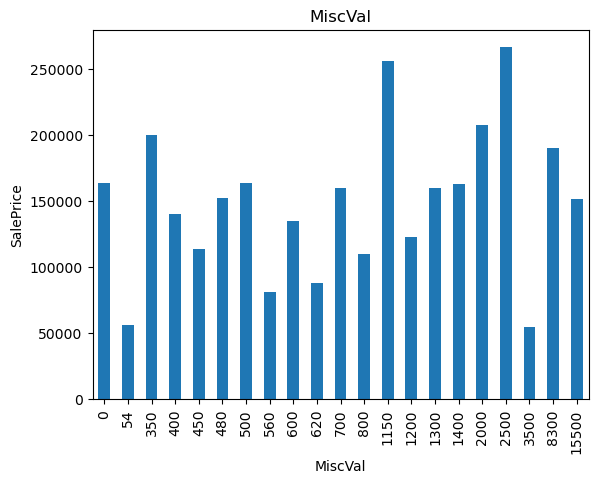

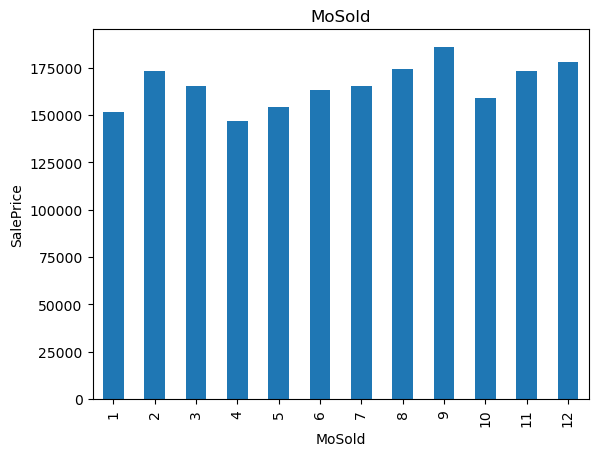

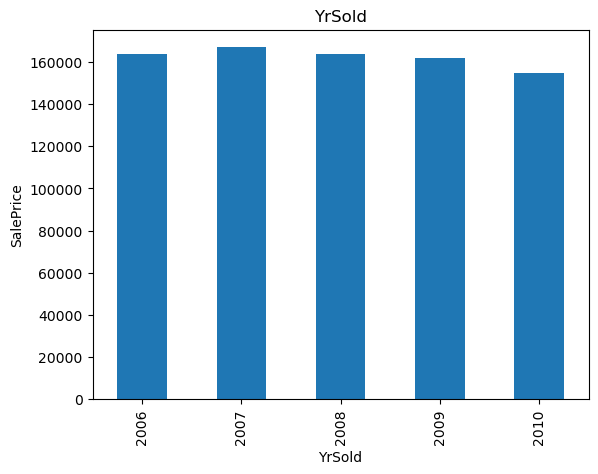

In [567]:
for i in train_desc:
    train.groupby([i])["SalePrice"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()
    

In [568]:
train_cont=[i for i in train_num if i not in train_desc]

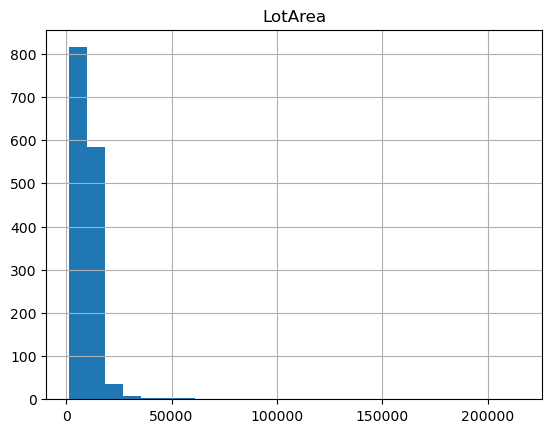

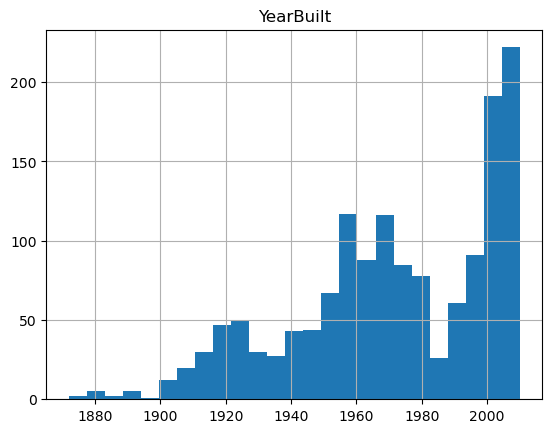

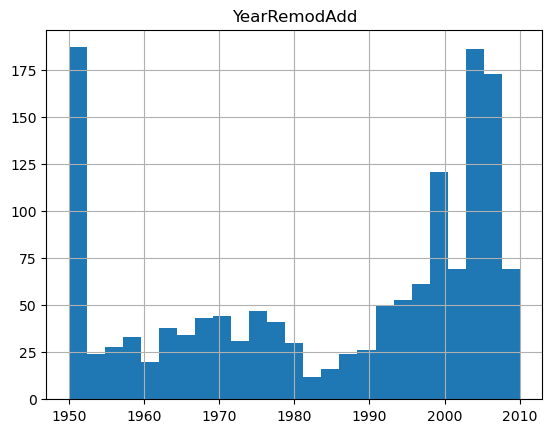

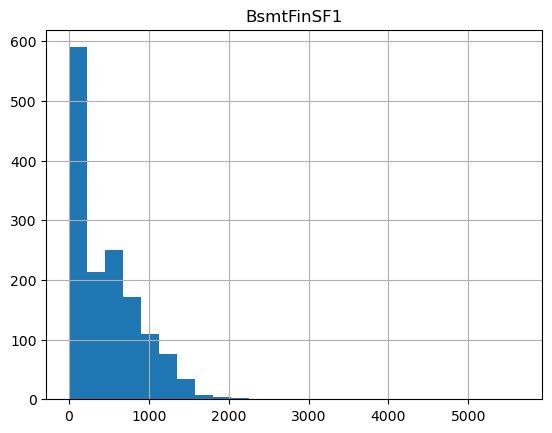

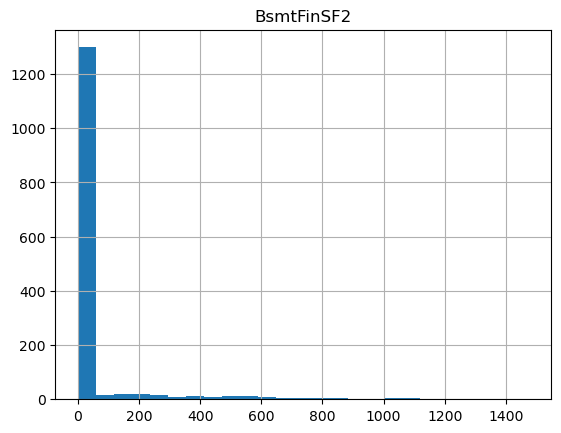

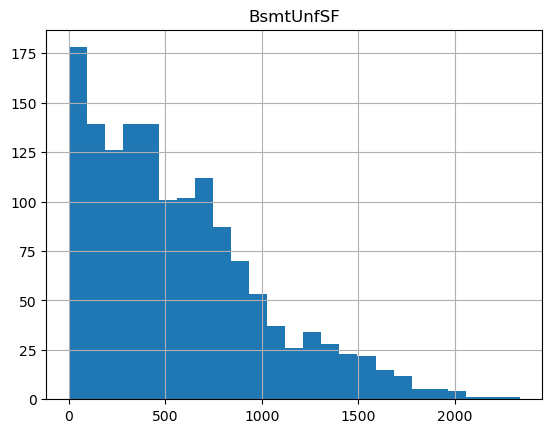

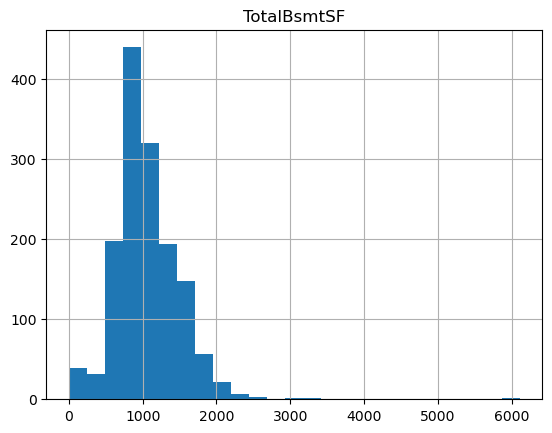

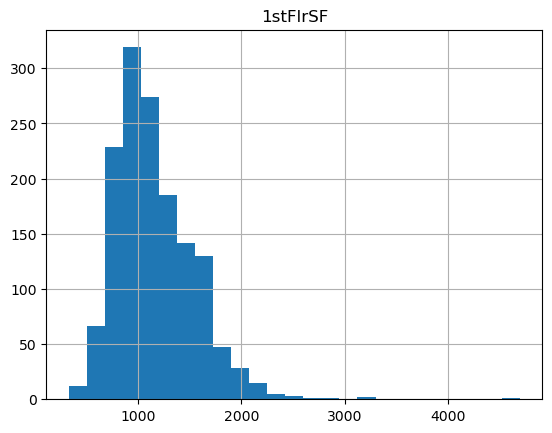

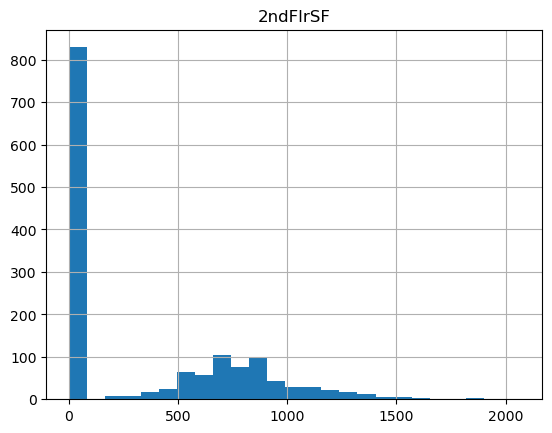

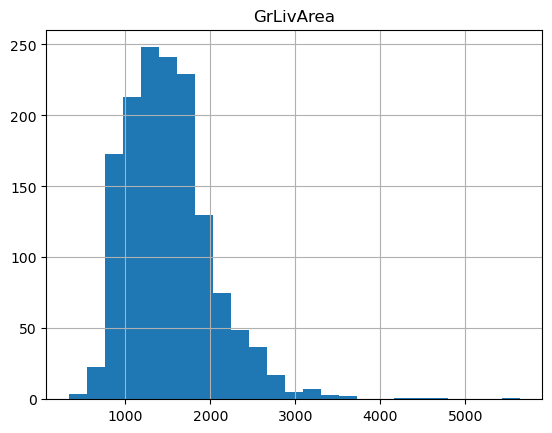

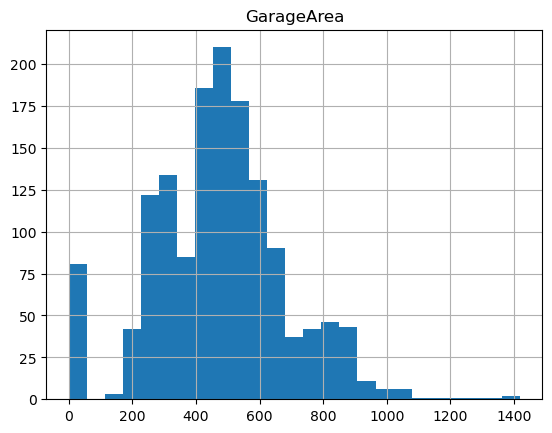

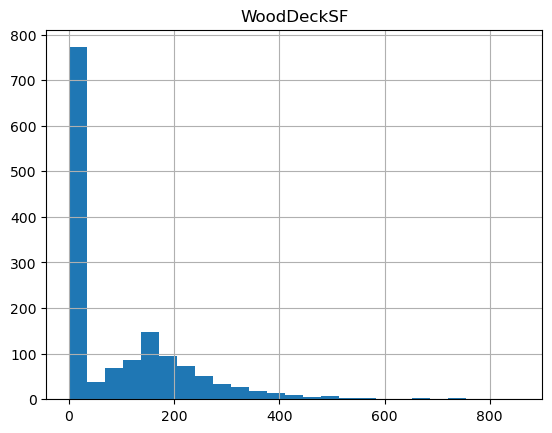

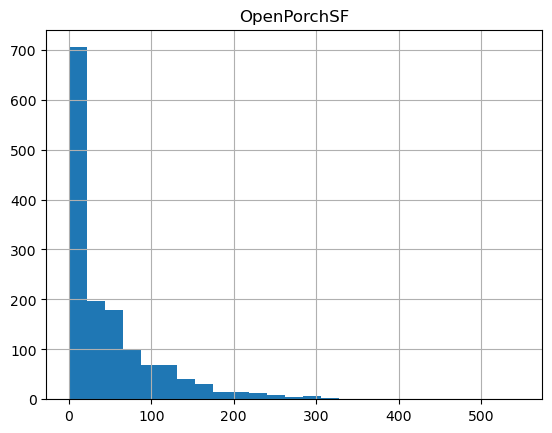

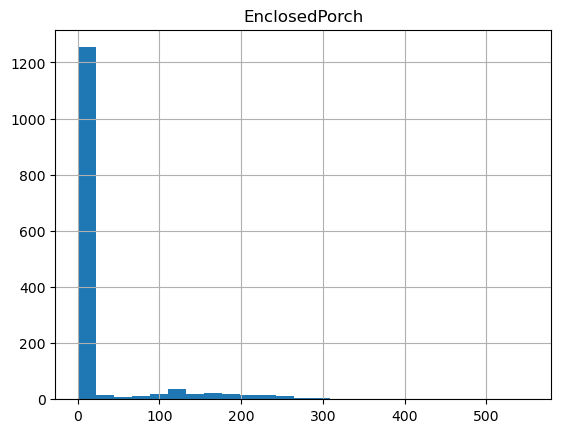

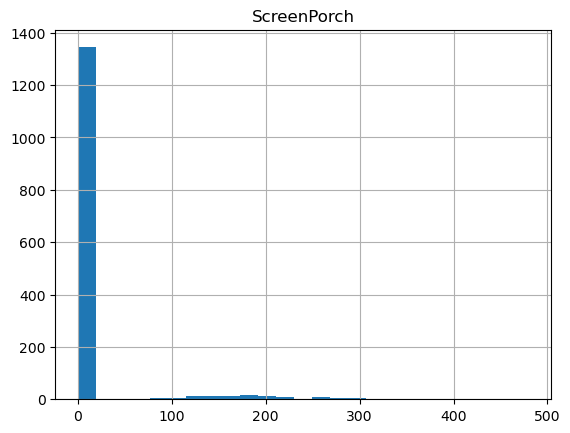

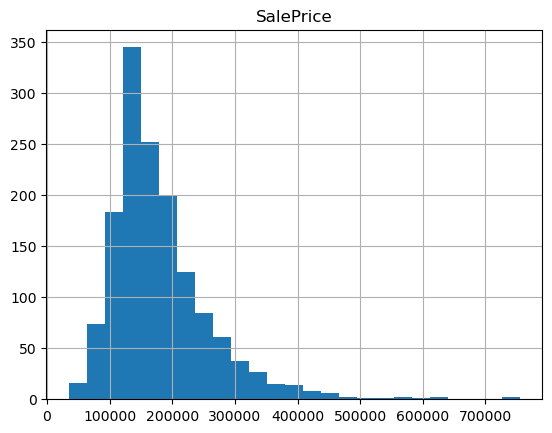

In [569]:
for i in train_cont:
    train[i].hist(bins=25)
    plt.title(i)
    plt.show()

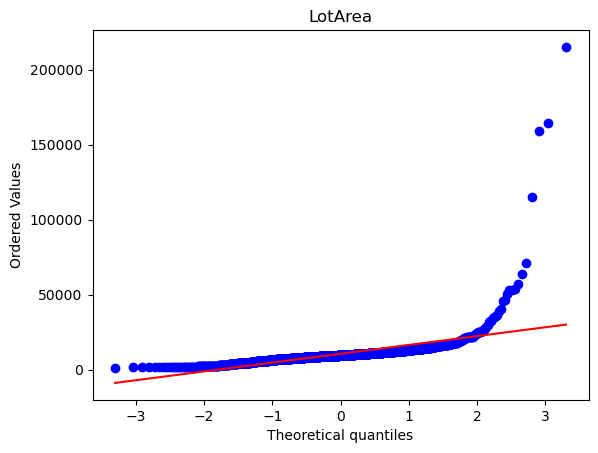

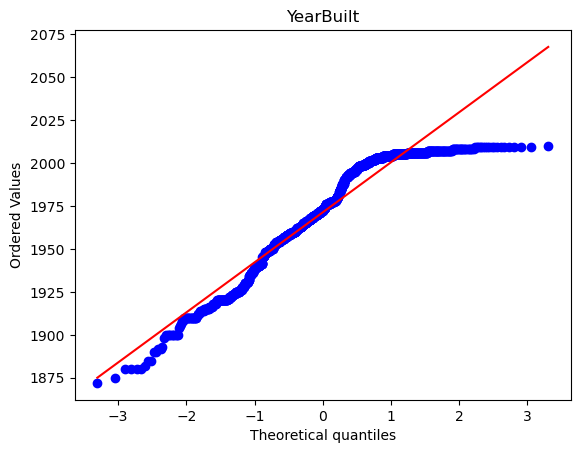

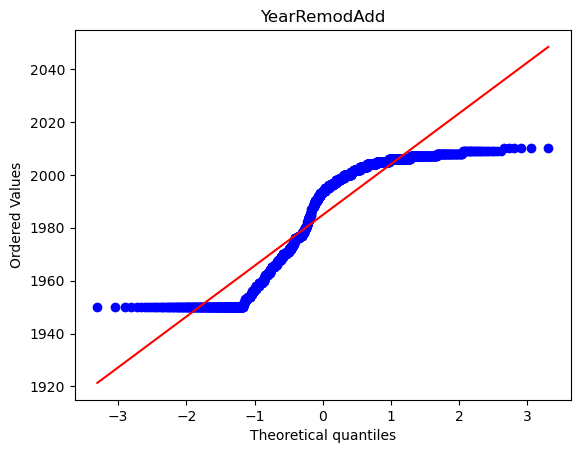

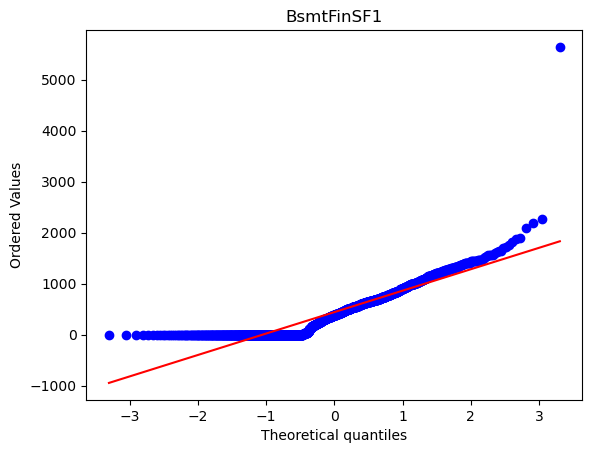

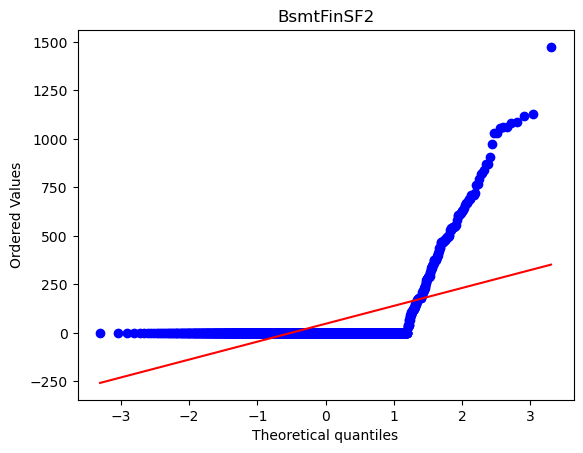

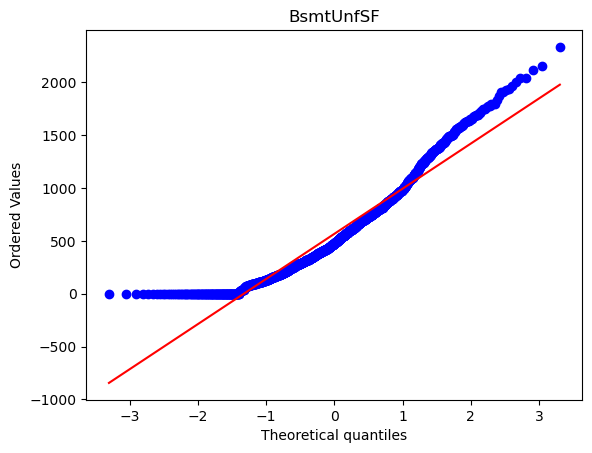

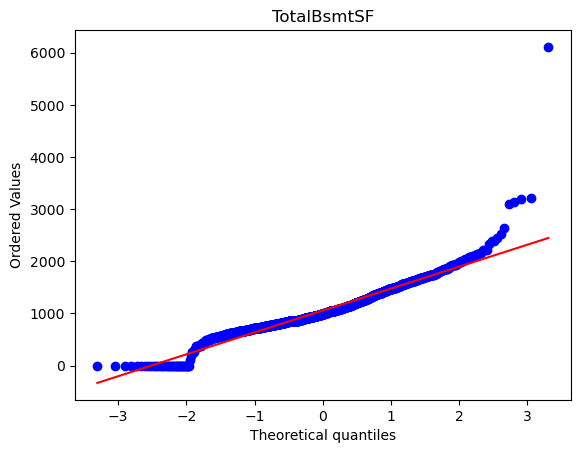

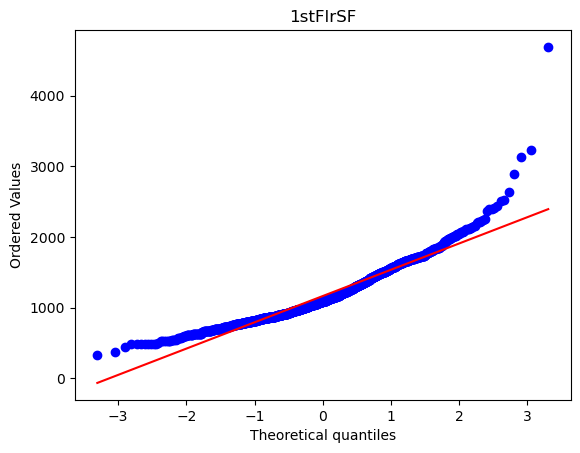

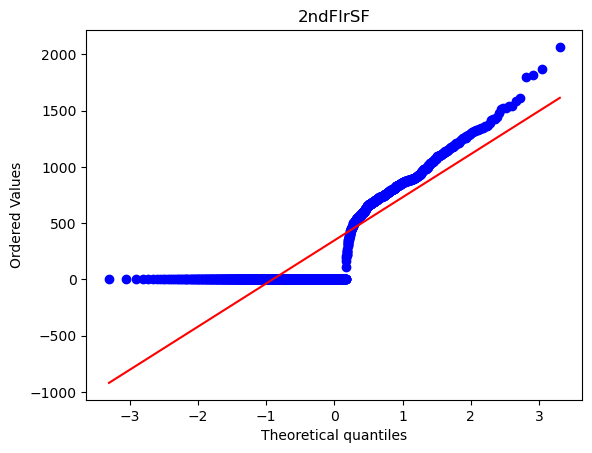

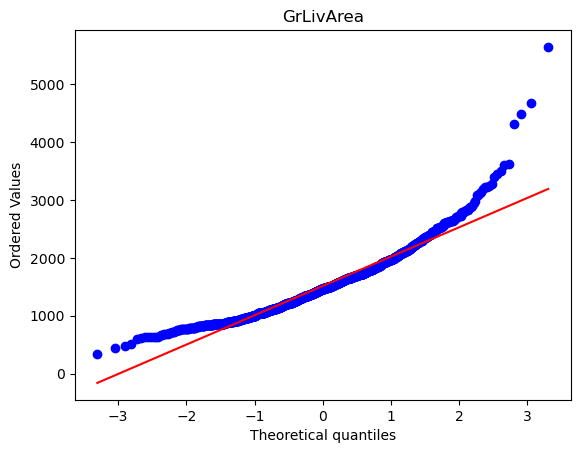

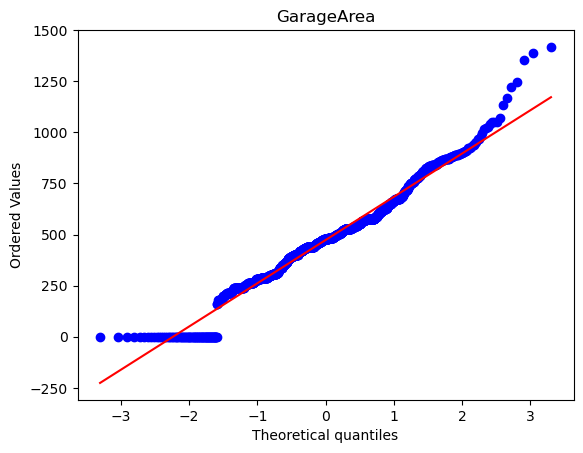

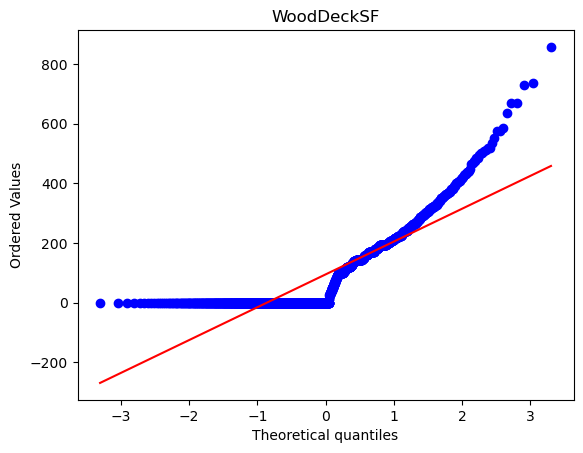

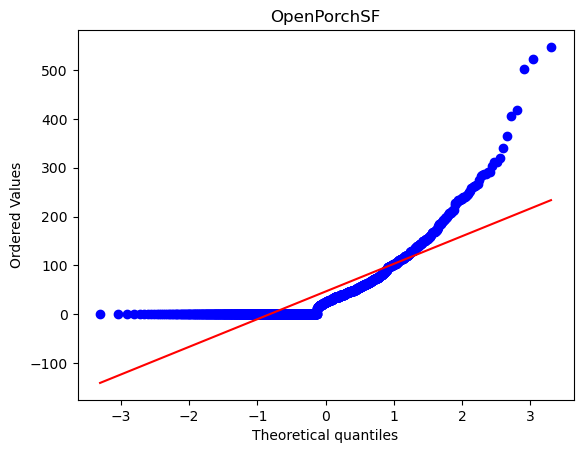

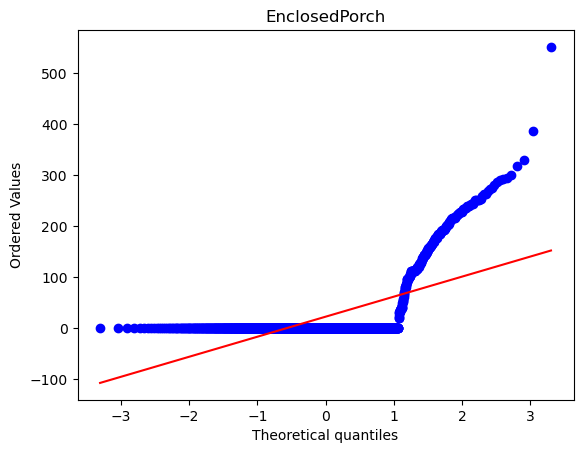

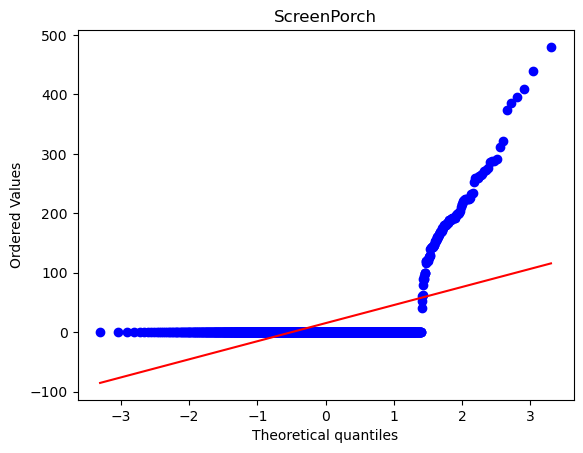

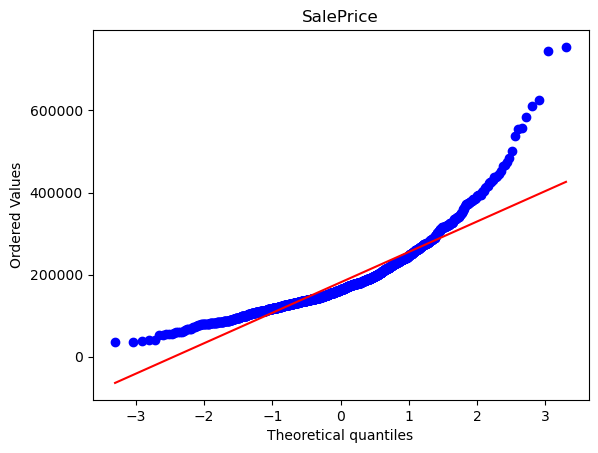

In [570]:
from scipy import stats
for i in train_cont:
    stats.probplot(train[i],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

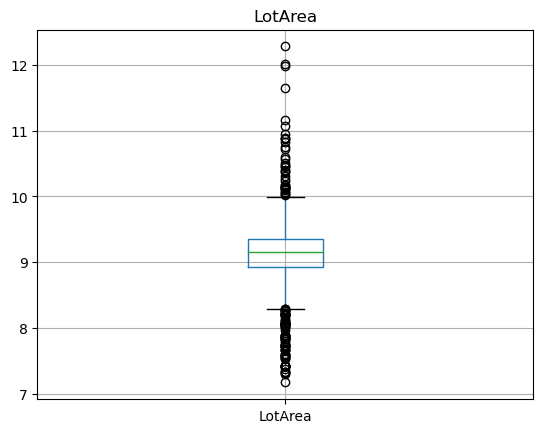

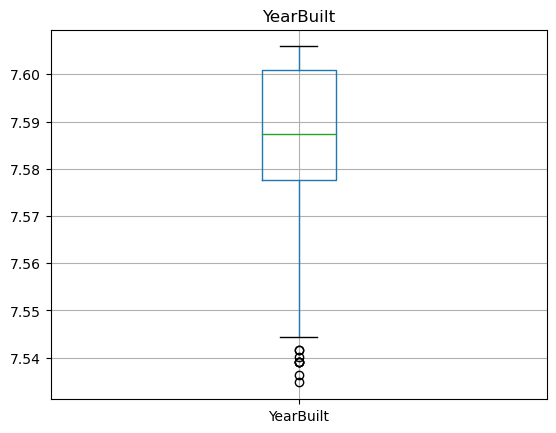

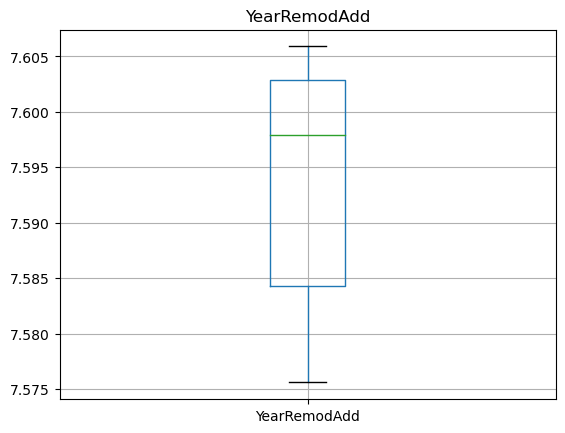

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


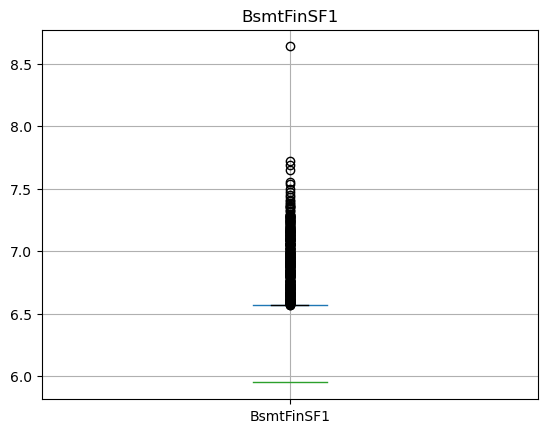

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


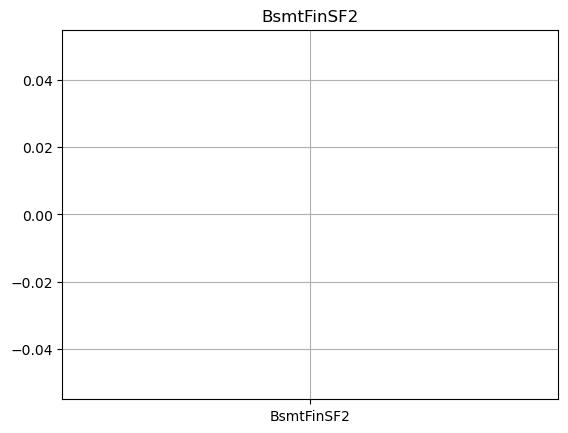

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


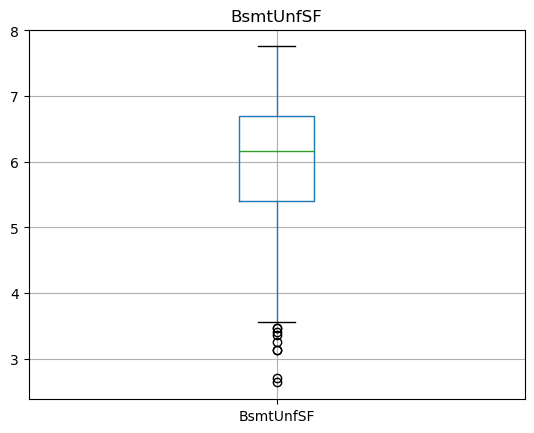

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


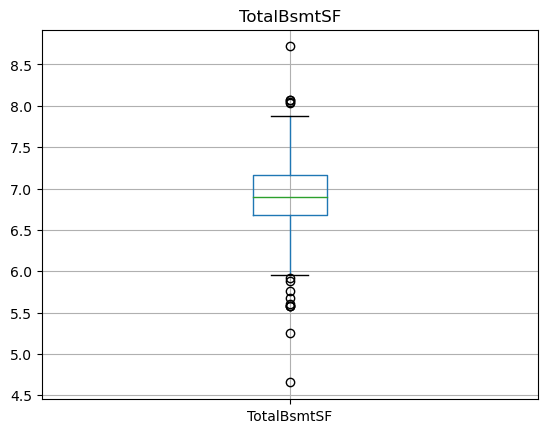

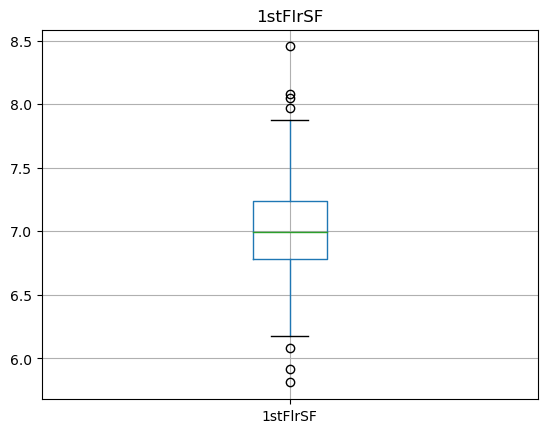

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


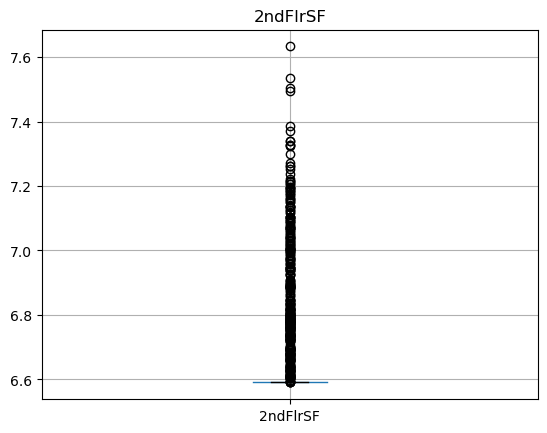

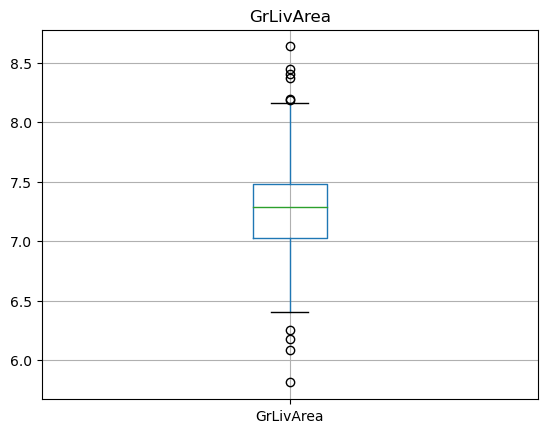

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


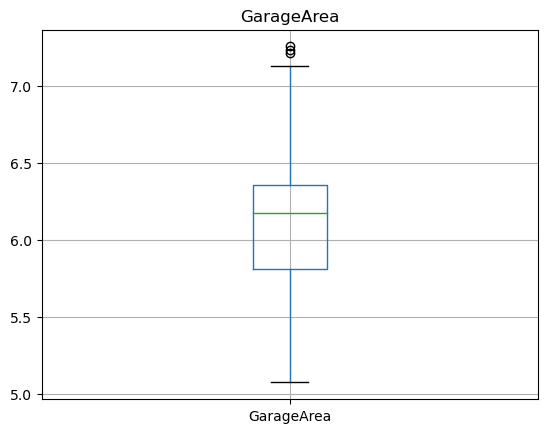

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


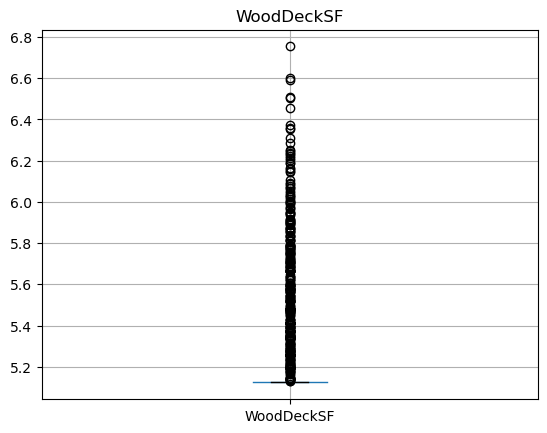

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


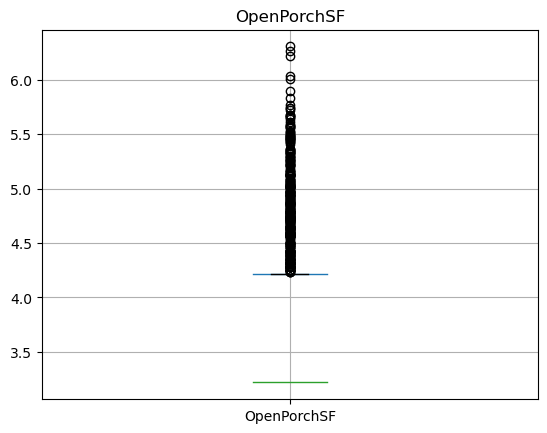

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


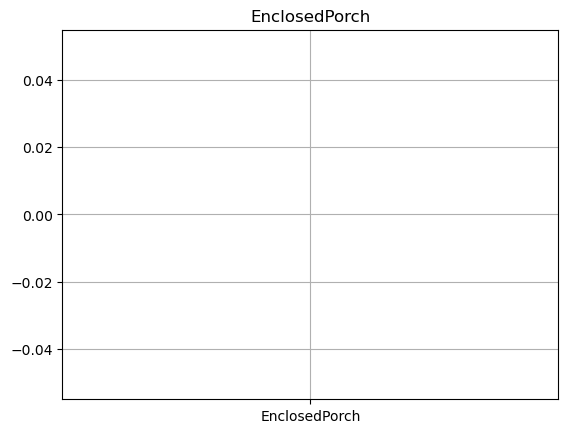

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


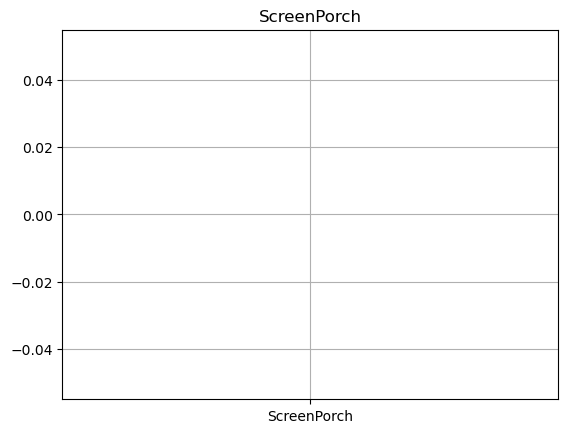

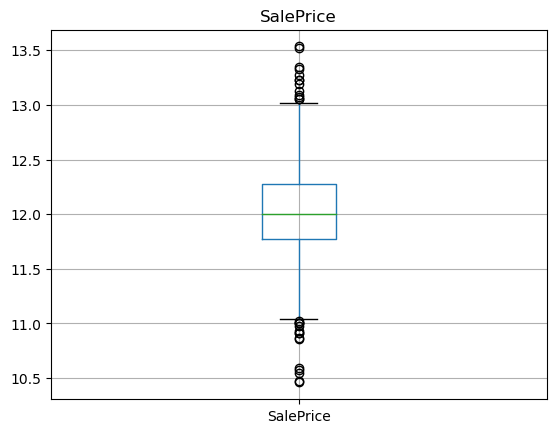

In [571]:
for i in train_cont:
    train[i]=np.log(train[i])
    train.boxplot(column=i)
    plt.title(i)
    plt.show()

In [572]:
train_num=train[train_num]
def correlation(data,thres):
    col=set()
    matrix=data.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if (matrix.iloc[i,j]>thres):
                col_val=matrix.columns[i]
                col.add(col_val)
    return col

correlation(train_num,0.8)



{'1stFlrSF',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageArea',
 'GarageCond',
 'GarageQual',
 'SalePrice',
 'TotRmsAbvGrd'}

In [573]:
for column in train.columns:
    typ = train[column].dtype
    if typ == "object":
        train[column] = train[column].fillna(train[column].mode()[0])
       
    else:
        train[column] = train[column].fillna(train[column].median())
#         test[column] = test[column].fillna(test[column].mean())

In [577]:
for i in train_cat:
    print(i,len(train[i].unique()))

Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
ExterQual 4
ExterCond 5
Foundation 6
Heating 6
HeatingQC 5
CentralAir 2
KitchenQual 4
Functional 7
PavedDrive 3
SaleType 9
SaleCondition 6


In [585]:
train["Neighborhood"]

25

In [597]:
list_10=train["Neighborhood"].value_counts().sort_values(ascending=False).head(10).index
list_10

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert',
       'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW'],
      dtype='object', name='Neighborhood')

In [592]:
import numpy as np
for categories in list_10:
    train[categories]=np.where(train["Neighborhood"]==categories,1,0)